In [49]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('../output_files/positions_data.txt', sep=' ', names=['particle', 'time', 'x', 'y', 'z'])

In [78]:
unique_times = data['time'].unique()

msd_all_shifts = pd.DataFrame()
for start_time in unique_times:
    shifted_data = data[data['time'] >= start_time].copy()

    shifted_data['initial_x'] = shifted_data.groupby('particle')['x'].transform('first')
    shifted_data['initial_y'] = shifted_data.groupby('particle')['y'].transform('first')
    shifted_data['initial_z'] = shifted_data.groupby('particle')['z'].transform('first')

    shifted_data['squared_displacement'] = (
        (shifted_data['x'] - shifted_data['initial_x'])**2 +
        (shifted_data['y'] - shifted_data['initial_y'])**2 +
        (shifted_data['z'] - shifted_data['initial_z'])**2
    )

    # group by the shifted time and get mean
    msd_shift = shifted_data.groupby('time')['squared_displacement'].mean().rename(f'msd_start_{start_time}')

    if msd_all_shifts.empty:
        msd_all_shifts = msd_shift.to_frame()
    else:
        msd_all_shifts = msd_all_shifts.join(msd_shift, how='outer')

msd_all_shifts['msd_mean'] = msd_all_shifts.mean(axis=1)
msd_results = msd_all_shifts['msd_mean'].reset_index()

         time    msd_mean
0       5.000    0.000000
1      10.001   19.141618
2      15.001   52.743592
3      20.000   61.897209
4      25.000   74.163674
..        ...         ...
430  2155.000  391.400206
431  2160.000  393.458413
432  2165.000  398.426794
433  2170.000  394.902314
434  2175.000  395.231723

[435 rows x 2 columns]


In [81]:
dimension = 3
slope, intercept, r_value, p_value, std_err = stats.linregress(msd_results['time'], msd_results['msd_mean'])
diffusion_constant = slope / (2 * dimension)

print("D:", diffusion_constant)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

D: 0.018207465121453017
Slope: 0.1092447907287181
Intercept: 195.27981593813576
R-squared: 0.7839136212673931


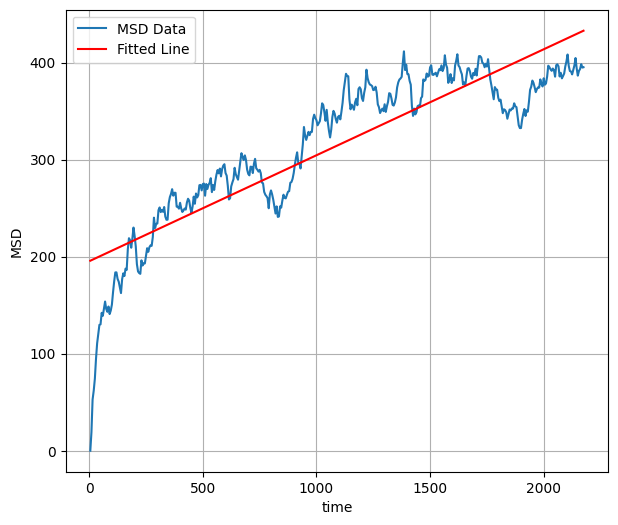

In [82]:
plt.figure(figsize=(7, 6))  

plt.plot(msd_results.time, msd_results.msd_mean, label='MSD Data')
plt.plot(msd_results['time'], intercept + slope * msd_results['time'], 'r', label='Fitted Line')

plt.xlabel('time')
plt.ylabel('MSD')

plt.legend()
plt.grid()
plt.show()